In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import read_csv

In [55]:
dataset = read_csv('Dataset/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization:

We have two types of plots:
1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

# Matplotlib Visualization:

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.


## 1. Scatter plot:

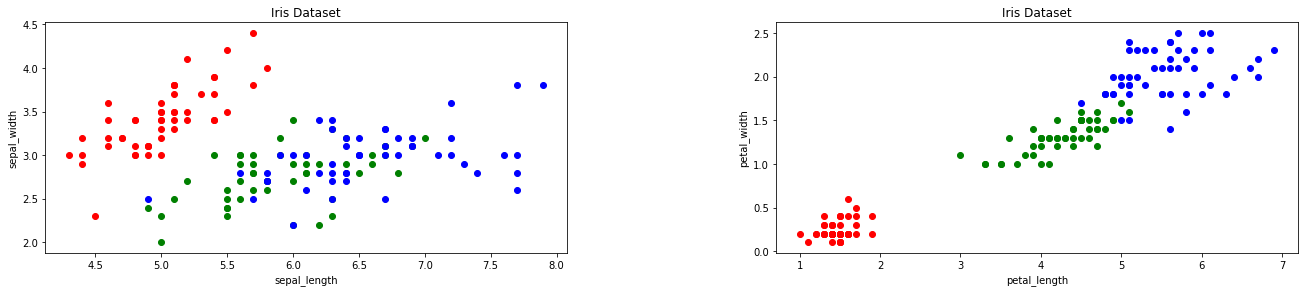

In [36]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# create a figure and axis
figure = plt.figure()

ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)

# plot each data-point
for i in range(len(dataset['sepal_length'])):
    ax1.scatter(dataset['sepal_length'][i], dataset['sepal_width'][i], color=colors[dataset['class'][i]])
    ax2.scatter(dataset['petal_length'][i], dataset['petal_width'][i], color=colors[dataset['class'][i]])
    
# set a title and labels
ax1.set_title('Iris Dataset') 
ax2.set_title('Iris Dataset')

ax1.set_xlabel('sepal_length')
ax2.set_xlabel('petal_length')

ax1.set_ylabel('sepal_width')
ax2.set_ylabel('petal_width')

# We can use the plt.subplots_adjust() method to change the space between Matplotlib subplots.
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=3, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## 2. Line Chart:

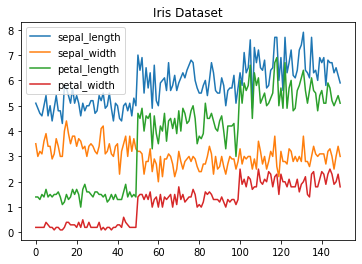

In [37]:
# get columns to plot
columns = dataset.columns.drop(['class'])

# create x data
x_data = range(0, dataset.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, dataset[column], label=column)

# set title and legend
ax.set_title('Iris Dataset')
ax.legend() # Place a legend on the Axes.

## 3. Histogram 
it automatically calculates how often each class occur

Text(0, 0.5, 'Frequency')

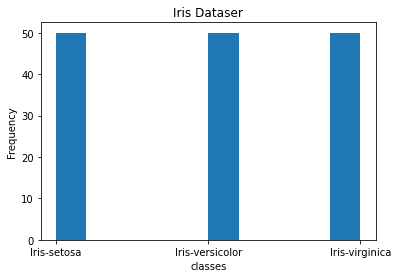

In [38]:
# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(dataset['class'])

# set title and labels
ax.set_title('Iris Dataser')
ax.set_xlabel('classes')
ax.set_ylabel('Frequency')

## 4. Bar Chart:
The bar-chart isn’t automatically calculating the frequency of a category so we are going to use pandas **value_counts** function to do this. 

Text(0, 0.5, 'Frequency')

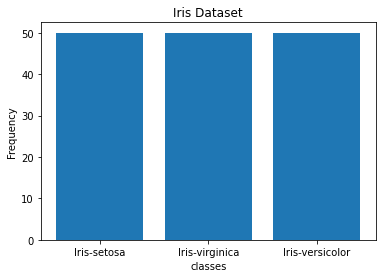

In [39]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = dataset['class'].value_counts() 

# get x and y data 
classes = data.index 
frequencies = data.values

# create bar chart 
ax.bar(classes, frequencies) 

# set title and labels 
ax.set_title('Iris Dataset') 
ax.set_xlabel('classes') 
ax.set_ylabel('Frequency')

### For choosing Colormaps in Matplolib go to this [link](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

# Pandas Visualization:
Pandas is an open source high-performance, easy-to-use library providing data structures, such as dataframes, and data analysis tools like the visualization tools ..

Pandas Visualization makes it really easy to create plots out of a pandas dataframe and series. 

It also has a higher level API than Matplotlib and therefore we need less code for the same results.


## 1. Scatter Plot:

<AxesSubplot:title={'center':'Iris Dataset'}, xlabel='petal_length', ylabel='petal_width'>

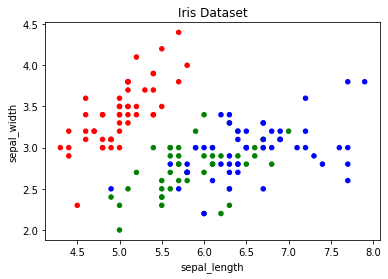

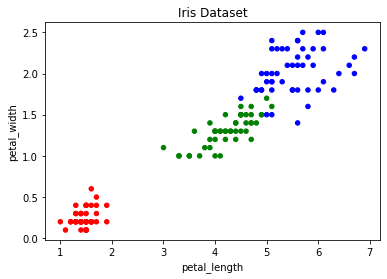

In [40]:
cmap = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
colors = []
for row in dataset.iterrows():
    colors.append(cmap[row[-1][-1]])
dataset.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset', c=colors)
dataset.plot.scatter(x='petal_length', y='petal_width', title='Iris Dataset', c=colors)

## 2. Line Chart:
in **Matplotlib** we needed to loop-through each column we wanted to plot, in **Pandas** we don’t need to do this because it automatically plots all available numeric columns

<AxesSubplot:title={'center':'Iris Dataset'}>

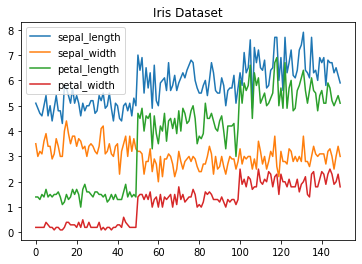

In [41]:
dataset.drop(['class'], axis=1).plot.line(title='Iris Dataset')

# parameters:
# labels:   (single label or list-like) Index or column labels to drop.
# axis:     ({0 or ‘index’, 1 or ‘columns’}, default 0) Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).


## 3. Histogram:

<AxesSubplot:ylabel='Frequency'>

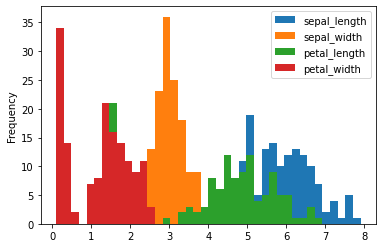

In [55]:
dataset.plot.hist(bins=40)

# Draw one histogram of the DataFrame’s columns.

# Parameters:
# by: str or sequence, optional, Column in the DataFrame to group by.
# bins: int, default 10, Number of histogram bins to be used.

## A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds 
# to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".


It’s also really easy to create multiple histograms:

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

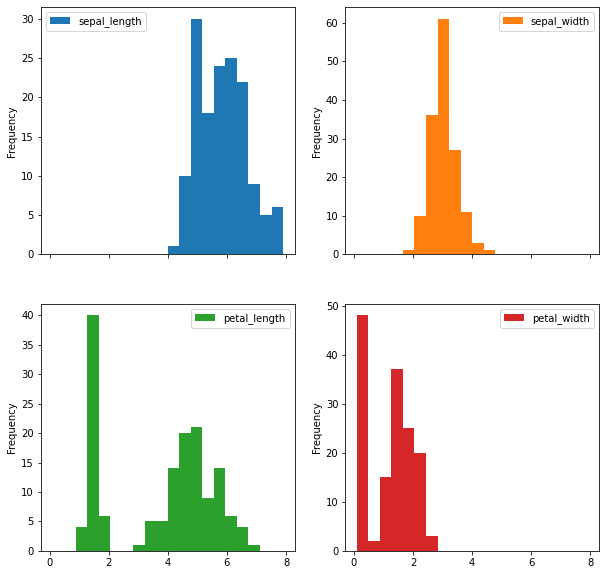

In [56]:
dataset.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

## 4. Bar Chart:
For this we will first count the occurrences using the **value_count()** method and then sort the occurrences from smallest to largest using the **sort_index()** method.

<AxesSubplot:>

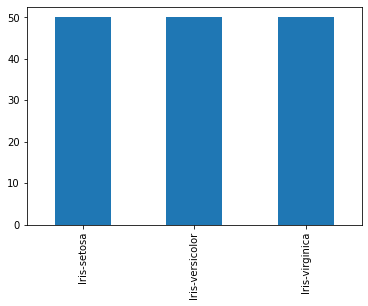

In [58]:
dataset['class'].value_counts().sort_index().plot.bar()

It’s also really simple to make a horizontal bar-chart using the **plot.barh()** method.

<AxesSubplot:>

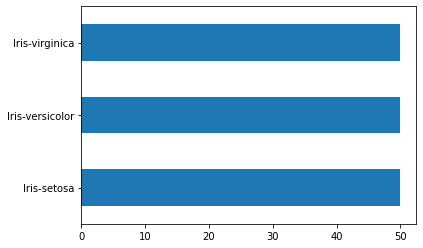

In [59]:
dataset['class'].value_counts().sort_index().plot.barh()

We can also plot other data then the number of occurrences:

In the example bello we will group the data by **class** and then take the mean of the **sepal_width**, order it, and plot the classes.

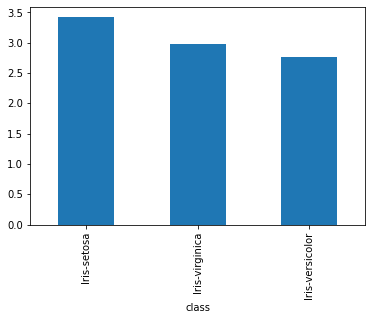

In [73]:
d = dataset.groupby("class").sepal_width.mean().sort_values(ascending=False).plot.bar()

# Seaborn Visualization:
Seaborn is a Python data visualization library based on Matplotlib. 

It provides a high-level interface for creating attractive graphs.
Seaborn has a lot to offer. You can create graphs in one line that would take you multiple tens of lines in Matplotlib. 

Its standard designs are awesome and it also has a nice interface for working with pandas dataframes.

## 1. Scatter plot:

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

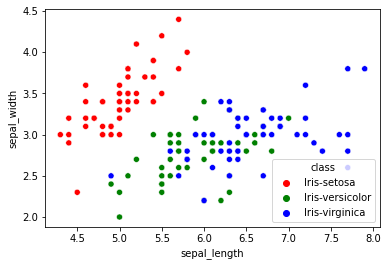

In [80]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', palette=['r', 'g', 'b'], data=dataset)

# hue: Grouping variable that will produce points with different colors.
# palette: Method for choosing the colors to use when mapping the hue semantic.

## 2. Line chart:


<AxesSubplot:>

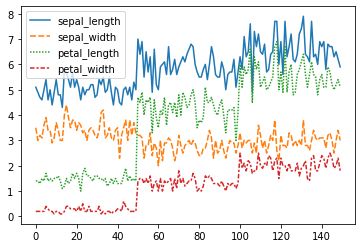

In [84]:
sns.lineplot(data=dataset.drop(['class'], axis=1))

## 3. Histogram:
To create a histogram in Seaborn we use the **sns.distplot** method. 

We need to pass it the column we want to plot and it will calculate the occurrences itself.

 We can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate inside the graph.

<AxesSubplot:xlabel='sepal_width'>

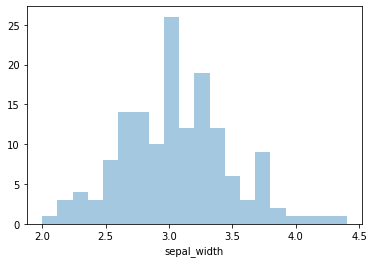

In [90]:
sns.distplot(dataset['sepal_width'], bins=20, kde=False)

# kde: Whether to plot a gaussian kernel density estimate
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.

## 4. Bar chart:

C:\Users\NewTech\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

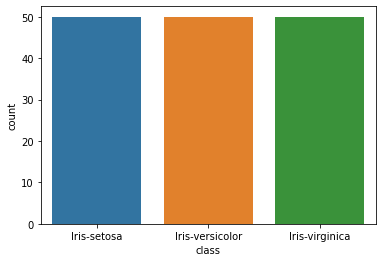

In [91]:
sns.countplot(dataset['class'])

# Other graphs:

## 1. Box plots (Box and Whisker plot):
A Box Plot is a graphical method of displaying the **five-number summary**.

### five-number summary:
The five-number summary is a set of descriptive statistics that provides information about a dataset. 

It consists of the five most important sample percentiles:

1. the sample minimum (smallest observation)
2. the lower quartile or first quartile (or the 25% mark)
3. the median (the middle value)
4. the upper quartile or third quartile (or the 75% mark)
5. the sample maximum (largest observation)

How to Find a Five-Number Summary: 
- Put your numbers in ascending order.
- Find the minimum and maximum for your data set
- Find the median. 
- Place parentheses around the numbers above and below the median.
- Find Q1 and Q3. Q1 can be thought of as a median in the lower half of the data, and Q3 can be thought of as a median for the upper half of data.


![Box plot](Images/box_plot.png)

A boxplot is a standardized way of displaying the distribution of data based on a **five number summary** (**minimum**, **first quartile (Q1)**, **median**, **third quartile (Q3**), and **maximum**). 

It can tell you about your **outliers** and what their values are. 

It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

- So, a boxplot is a graph that gives you a good indication of how the values in the data are spread out. It seperates the data into 4 equal parts, even though the parts may differ in length (spread), each contains **25%** of the data.
- if the length of a whisker or the box is short, the data will be more concentrated in that area. (Less Variability)
- if the length of a whisker or the box is long, the data will be less concentrated in that area. (More Variability)

### Pandas:

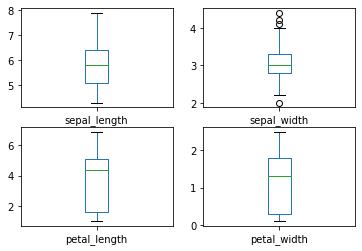

In [52]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# sharex: In case subplots=True, share x axis and set some x axis labels to invisible;  
plt.show()

### Seaborn:

C:\Users\NewTech\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

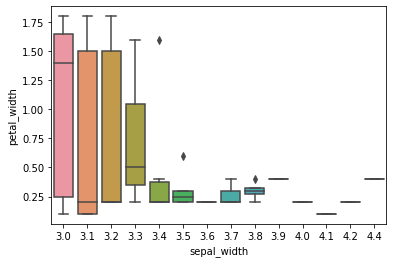

In [4]:
df = dataset[(dataset['sepal_width']>=3) & (dataset['petal_width']<2)]
sns.boxplot('sepal_width', 'petal_width', data=df)

## 2. Heatmap:
A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

Heatmaps are perfect for exploring the **correlation of features** in a dataset.

### What is a Correlation Matrix?
A correlation matrix is simply a table which displays the correlation coefficients for different variables. 

The matrix depicts the correlation between all the possible pairs of values in a table. 

It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

here are several methods for calculating a correlation value. The most popular one is **Pearson Correlation Coefficient**. Nevertheless, it should be noticed that it measures only linear relationship between two variables. In other words, it may not be able to reveal a nonlinear relationship.

The value of Pearson correlation ranges from **-1** to **+1**, where **+**/**- 1** describes a perfect positive/negative correlation and **0** means no correlation.

The correlation matrix is a symmetrical matrix with all diagonal elements equal to **+1**.

In [6]:
dataset.corr() # get correlation matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Matplotlib:

[None, None, None, None, None, None, None, None]

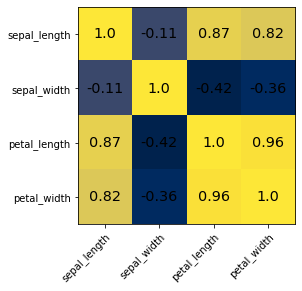

In [36]:
import numpy as np

# get correlation matrix
corr = dataset.corr()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values, cmap='cividis')

# set labels
ax.set_xticks(np.arange(len(corr.columns))) # Set the xaxis' tick locations. If necessary, the view limits of the Axis are expanded so that all given ticks are visible.
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns) # Set the xaxis' labels with list of string labels.
ax.set_yticklabels(corr.columns) # Set the yaxis' labels with list of string labels.

# # Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, round(corr.values[i, j], 2),
                       ha="center", va="center", color="black", size='x-large')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

### Seaborn:
Seaborn makes it way easier to create a heatmap and add annotations.

<AxesSubplot:>

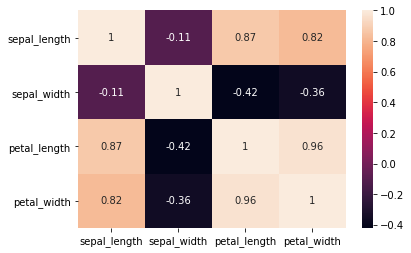

In [37]:
sns.heatmap(dataset.corr(), annot=True)

## 3. Faceting:
Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.

Faceting is really helpful if you want to quickly explore your dataset.

To use one kind of faceting in **Seaborn** we can use the **FacetGrid**. 

First of all, we need to define the **FacetGrid** and pass it our data as well as a row or column, which will be used to split the data. 

Then we need to call the ****map** function on our **FacetGrid** object and define the **plot type** we want to use, as well as the **column** we want to graph.

For more information go to [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

To explore seaborn's plot types go to this [link](https://seaborn.pydata.org/examples/index.html)

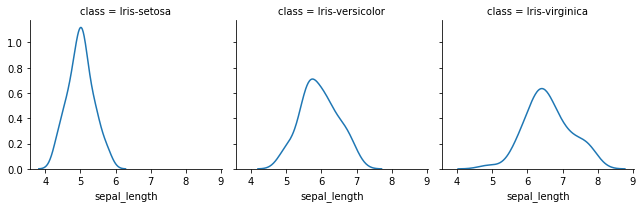

In [38]:
g = sns.FacetGrid(dataset, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

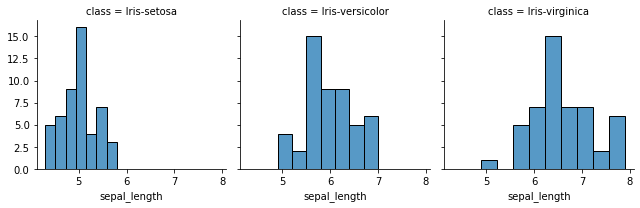

In [39]:
g = sns.FacetGrid(dataset, col='class')
g = g.map(sns.histplot, 'sepal_length')

## 4. Pairplot:
Plot pairwise relationships in a dataset.

For more information go to this [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

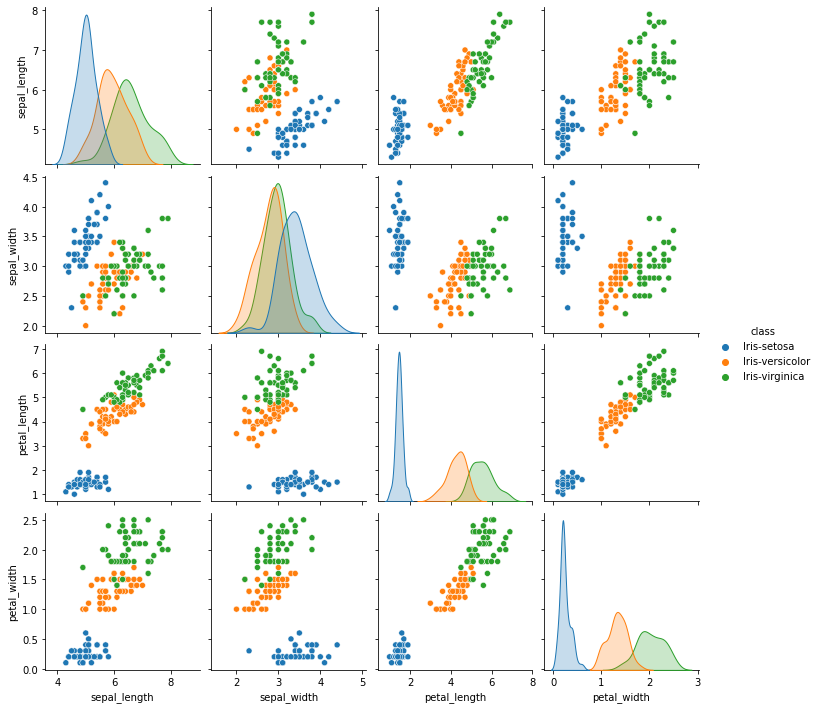

In [43]:
sns.pairplot(dataset, hue="class")
# The simplest invocation uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal
# Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)

**Pandas scatter_matrix** , also enables you to plot a grid of pairwise relationships in a dataset.

<ipython-input-44-446010144cd7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(dataset, alpha=1, ax=ax)


array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

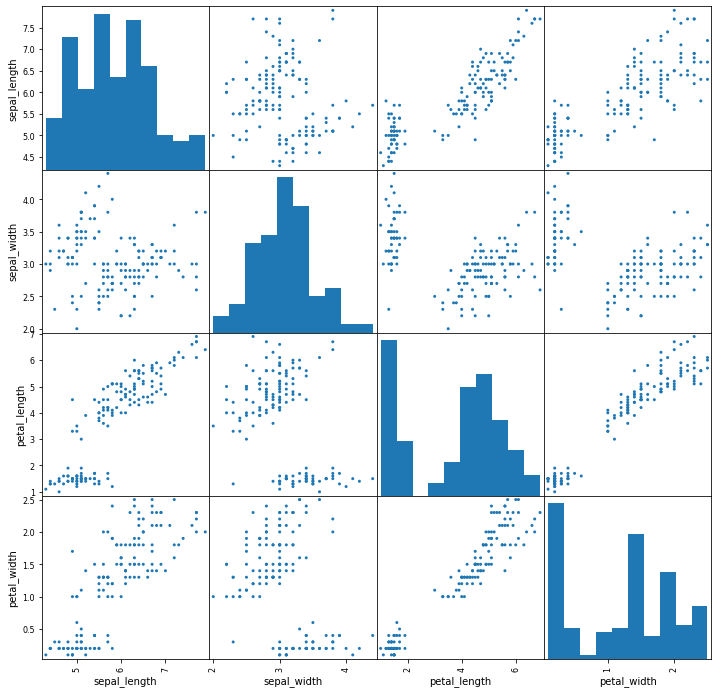

In [44]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(dataset, alpha=1, ax=ax)

# alpha: Amount of transparency applied.